https://mybinder.org/v2/gh/dask/dask-examples/master?filepath=dataframe.ipynb

# Dask DataFrames
     
Dask Dataframes coordinate many Pandas dataframes, partitioned along an index.  They support a large subset of the Pandas API.

## Start Dask Client for Dashboard

Starting the Dask Client is optional.  It will provide a dashboard which 
is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [29]:
client.close()

Exception ignored in: <generator object add_client at 0x1c1e731d00>
RuntimeError: generator ignored GeneratorExit
Future exception was never retrieved
future: <Future finished exception=CommClosedError('in <closed TCP>: Stream is closed',)>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/distributed/comm/tcp.py", line 179, in read
    n_frames = yield stream.read_bytes(8)
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1099, in run
    value = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1107, in run
    yielded = self.gen.throw(*exc_info)
  File "/anaconda3/lib/python3.6/site-packages/distributed/comm/tcp.py", line 200, in read
    convert_stream_closed_error(self, e)
  File "/anaconda3/lib/python3.6/site-packages/distributed/comm/tcp.p

In [2]:

df = dd.demo.make_timeseries('2000-01-01', '2000-12-31', freq='10s', partition_freq='1M',
                             dtypes={'name': str, 'id': int, 'x': float, 'y': float})

In [4]:
df.head(3)

,id,name,x,y
2000-01-31 00:00:00,992,Victor,0.383347,0.959930
2000-01-31 00:00:10,1042,Zelda,-0.164097,0.832605
2000-01-31 00:00:20,973,Patricia,0.993822,-0.143941


## Use Standard Pandas Operations

Most common Pandas operations operate identically on Dask dataframes

In [8]:
df2 = df[df.y > 0]
df3 = df2.groupby('name').x.std()

In [9]:
df3.head()

name
Alice      0.576812
Bob        0.576252
Charlie    0.577094
Dan        0.576778
Edith      0.576868
Name: x, dtype: float64

## Convert to Pandas
Call `.compute()` when you want your result as a Pandas dataframe.

If you started `Client()` above then you may want to watch the status page during computation.

In [10]:
computed_df = df3.compute()
type(computed_df)

pandas.core.series.Series

In [11]:
df = df.persist()

## Time Series Operations

Because we have a datetime index time-series operations work efficiently

,x,y
2000-01-31 00:00:00,0.383347,0.959930
2000-01-31 00:00:10,0.109625,0.896267
2000-01-31 00:00:20,0.404357,0.549531
2000-01-31 00:00:30,0.389084,0.622817
2000-01-31 00:00:40,0.178556,0.343617


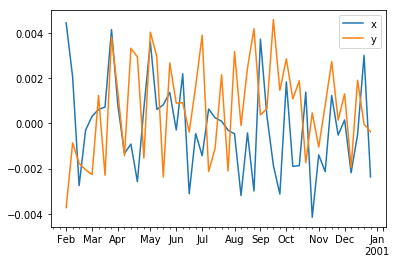

In [12]:
%matplotlib inline
df[['x', 'y']].resample('1w').mean().head()
df[['x', 'y']].resample('1w').mean().compute().plot()
df[['x', 'y']].rolling(window='7d').mean().head()

Random access is cheap along the index, but must still be computed.

In [13]:
df.loc['2000-05-05']
%time df.loc['2000-05-05'].compute()

CPU times: user 19.1 ms, sys: 1.86 ms, total: 21 ms
Wall time: 23.9 ms


,id,name,x,y
2000-05-05 00:00:00,963,Ursula,0.708507,-0.509083
2000-05-05 00:00:10,1051,Zelda,0.558608,0.119815
2000-05-05 00:00:20,1038,Edith,0.002557,0.226903
2000-05-05 00:00:30,994,Yvonne,-0.278181,0.351302
2000-05-05 00:00:40,983,Tim,-0.221173,-0.644724
2000-05-05 00:00:50,1001,Ingrid,-0.004135,-0.539117
2000-05-05 00:01:00,973,Laura,0.485552,-0.332837
2000-05-05 00:01:10,980,Alice,-0.780596,-0.066480
2000-05-05 00:01:20,1001,Zelda,0.277994,-0.547243
2000-05-05 00:01:30,1032,Yvonne,-0.246143,0.010390


## Set Index

Data is sorted by the index column.  This allows for faster access, joins, groupby-apply operations, etc..  However sorting data can be costly to do in parallel, so setting the index is both important to do, but only infrequently.

In [14]:
df = df.set_index('name')
df

,id,x,y
npartitions=11,,,
Alice,int64,float64,float64
Alice,...,...,...
...,...,...,...
Xavier,...,...,...
Zelda,...,...,...


Because computing this dataset is expensive and we can fit it in our available RAM, we persist the dataset to memory.

In [15]:
df = df.persist()

Dask now knows where all data lives, indexed cleanly by name.  As a result oerations like random access are cheap and efficient

In [16]:
%time df.loc['Alice'].compute()

CPU times: user 43.6 ms, sys: 10.8 ms, total: 54.5 ms
Wall time: 184 ms


,id,x,y
name,,,
Alice,1038,0.372644,0.695916
Alice,996,0.082598,0.000683
Alice,1008,0.065949,-0.542641
Alice,992,-0.967305,0.626383
Alice,992,0.971805,-0.716736
Alice,998,-0.491737,0.182993
Alice,970,-0.978182,0.332324
Alice,1039,0.909424,0.166735
Alice,939,0.168363,-0.202478


## Groupby Apply with Scikit-Learn

Now that our data is sorted by name we can easily do operations like random access on name, or groupby-apply with custom functions.

Here we train a different Scikit-Learn linear regression model on each name.

In [18]:
from  sklearn.linear_model import LinearRegression

def train(partition):
    est = LinearRegression()
    est.fit(partition[['x']].values, partition.y.values)
    return est

In [19]:
df.groupby('name').apply(train, meta=object).compute()

name
Alice       LinearRegression(copy_X=True, fit_intercept=Tr...
Bob         LinearRegression(copy_X=True, fit_intercept=Tr...
Charlie     LinearRegression(copy_X=True, fit_intercept=Tr...
Dan         LinearRegression(copy_X=True, fit_intercept=Tr...
Edith       LinearRegression(copy_X=True, fit_intercept=Tr...
Frank       LinearRegression(copy_X=True, fit_intercept=Tr...
George      LinearRegression(copy_X=True, fit_intercept=Tr...
Hannah      LinearRegression(copy_X=True, fit_intercept=Tr...
Ingrid      LinearRegression(copy_X=True, fit_intercept=Tr...
Jerry       LinearRegression(copy_X=True, fit_intercept=Tr...
Kevin       LinearRegression(copy_X=True, fit_intercept=Tr...
Laura       LinearRegression(copy_X=True, fit_intercept=Tr...
Michael     LinearRegression(copy_X=True, fit_intercept=Tr...
Norbert     LinearRegression(copy_X=True, fit_intercept=Tr...
Oliver      LinearRegression(copy_X=True, fit_intercept=Tr...
Patricia    LinearRegression(copy_X=True, fit_intercept=Tr...
Qui

In [25]:
from dask import dataframe as dd 
import pandas as pd
c = ['a','b','c']
d = [1,2,3]
df = pd.DataFrame(c,d)
df

,0
1,a
2,b
3,c


In [26]:
sd = dd.from_pandas(df, npartitions=3)
print (sd)

Dask DataFrame Structure:
                    0
npartitions=2        
1              object
2                 ...
3                 ...
Dask Name: from_pandas, 2 tasks
